# Invisible Labor

**Import Dependencies**

In [1]:
import pandas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Sets up seaborn for graphs to have grids
sns.set(color_codes=True)

Use this cell to import MTurk Data

In [2]:
# Reads in CSV and sets the appropriate column names
df_mturk = pd.read_csv("data/records.csv", names=['ID', 'Current', 'Event', 'Extra', 'Platform', 'Skip', 'Subtype', 'Time', 'Type', 'User'])

Print Basic information regarding DataFrames

In [3]:
print(df_mturk.info())
df_mturk.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496374 entries, 0 to 3496373
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   ID        int64  
 1   Current   object 
 2   Event     object 
 3   Extra     object 
 4   Platform  object 
 5   Skip      float64
 6   Subtype   object 
 7   Time      int64  
 8   Type      object 
 9   User      object 
dtypes: float64(1), int64(2), object(7)
memory usage: 266.8+ MB
None


,ID,Current,Event,Extra,Platform,Skip,Subtype,Time,Type,User
0,1,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_LOAD,NaN,OTHER,0.0,OTHER,1588994215395,OTHER,ae862298385abab2a0a1619f8cedef9d
1,2,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_BLUR,NaN,OTHER,0.0,OTHER,1588994217989,OTHER,ae862298385abab2a0a1619f8cedef9d
2,3,https://worker.mturk.com/projects/354DQCRRIJZH...,TAB_CHANGE,NaN,MTURK,0.0,TASK_STARTED,1588994218051,WORKING,ae862298385abab2a0a1619f8cedef9d
3,4,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_FOCUS,NaN,OTHER,0.0,OTHER,1588994221371,OTHER,ae862298385abab2a0a1619f8cedef9d
4,5,https://docs.google.com/forms/d/e/1FAIpQLScvig...,TAB_CHANGE,NaN,OTHER,0.0,OTHER,1588994221397,OTHER,ae862298385abab2a0a1619f8cedef9d


# DATA CLEANING

In [4]:
df_mturk = df_mturk.drop(columns=['Extra', 'Skip'])
df_mturk = df_mturk.dropna()
df_mturk.head()


,ID,Current,Event,Platform,Subtype,Time,Type,User
0,1,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_LOAD,OTHER,OTHER,1588994215395,OTHER,ae862298385abab2a0a1619f8cedef9d
1,2,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_BLUR,OTHER,OTHER,1588994217989,OTHER,ae862298385abab2a0a1619f8cedef9d
2,3,https://worker.mturk.com/projects/354DQCRRIJZH...,TAB_CHANGE,MTURK,TASK_STARTED,1588994218051,WORKING,ae862298385abab2a0a1619f8cedef9d
3,4,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_FOCUS,OTHER,OTHER,1588994221371,OTHER,ae862298385abab2a0a1619f8cedef9d
4,5,https://docs.google.com/forms/d/e/1FAIpQLScvig...,TAB_CHANGE,OTHER,OTHER,1588994221397,OTHER,ae862298385abab2a0a1619f8cedef9d


### MTURK_SURVEY_DATA CLEANING

In [5]:
df_mturk_survey = pd.read_csv("data/mturk_survey_data.csv")
df_mturk_short = df_mturk_survey[['user_id', 'id', 'Worker ID', 'How many hours daily do you think you dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)', 'How many hours daily would you like to  dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)', 'Please state, what is your hourly wage on Amazon Mechanical Turk? (Approximately) ', 'Please state what is your gender:', 'Please state what is your age:', 'Please state which is the country where you have lived most of your life:', 'Education level','Annual income']].copy()
df_mturk_short = df_mturk_short.rename(columns={'Please state, what is your hourly wage on Amazon Mechanical Turk? (Approximately) ': 'Hourly Wage: Amazon MTurk', 'Please state what is your gender:': 'Gender', 'Please state what is your age:': 'Age', 'Please state which is the country where you have lived most of your life:': 'Country'})
df_mturk_short =df_mturk_short.rename(columns={'How many hours daily do you think you dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)' : 'Time worker thinks will spend working'})
df_mturk_short = df_mturk_short.dropna()
df_mturk_short


,user_id,id,Worker ID,Time worker thinks will spend working,"How many hours daily would you like to dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)",Hourly Wage: Amazon MTurk,Gender,Age,Country,Education level,Annual income
1,10a76d9ce5e5dfee6352614a9b18b6bc,79,A1PJEIP51Q7JTN,60.0,60,1,Male,25-34 years old,India,Bachelor’s degree,"$0 – $9,999"
2,1164fceb602e16e44dc3f6e49ec51,27,A3QJ14Y7N8VQ42,240.0,30,6,Male,25-34 years old,India,Master’s degree,"$80,000 – $89,999"
3,1c4a09c264cc784a227191d775b213b,11,A9EVF0SO2IUJ0,120.0,60,4,Male,35-44 years old,India,Bachelor’s degree,"$10,000 – $19,999"
4,13327b278744b9997a995fbfcc83d9e,4,A13QHXMU0OMNAY,60.0,120,2,Female,25-34 years old,India,Bachelor’s degree,"$50,000 – $59,999"
7,2a1d22d7101b7b66e06530c86d1b57b0,22,ASWZO1WY1UHEP,300.0,120,3,Male,25-34 years old,India,Bachelor’s degree,"$0 – $9,999"
...,...,...,...,...,...,...,...,...,...,...,...
93,f4b1f58182ccaef03a28fed5539a89f9,33,A3ATSR1NVX851J,120.0,"I don't know, but certainly not long.",3,Female,25-34 years old,Brazil,High school degree,"$20,000 – $29,999"
94,f7894afaa9c87d30f7b8a102e92479d,12,A2LFQCVQXRGCNE,60.0,60,2,Female,18-24 years old,United States,Bachelor’s degree,"$30,000 – $39,999"
96,fccf29e7a47d097ee4695db8aa1bf5,55,A1K8VUKRL53OX,180.0,120,1.5,Male,25-34 years old,United States,Bachelor’s degree,"$60,000 – $69,999"
97,fd89522795bd36f4ee4ae5f0a11c71,48,A15RNM75ICEC05,240.0,0,2,Male,25-34 years old,India,Bachelor’s degree,"$0 – $9,999"


# Description of outcome
We are looking to see how people of a different demographics perform on the toloka and mturk platforms

Text(0.5, 0, 'Workers')

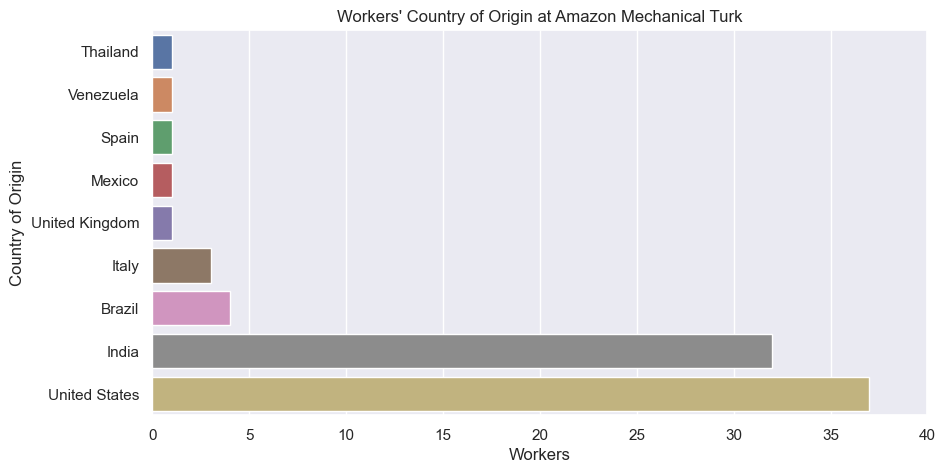

In [6]:
fig, ax_mturk = plt.subplots(1, 1, figsize=(10, 5))
ax_mturk = sns.countplot(y="Country", data=df_mturk_short, order=df_mturk_short['Country'].value_counts(ascending=True).index)
ax_mturk.set_title("Workers' Country of Origin at Amazon Mechanical Turk")
ax_mturk.set_xticks(np.arange(0, 41, 5))
ax_mturk.set_ylabel("Country of Origin")
ax_mturk.set_xlabel("Workers")

In [7]:
df_mturk_short.dtypes

user_id                                                                                                                                       object
id                                                                                                                                             int64
Worker ID                                                                                                                                     object
Time worker thinks will spend working                                                                                                        float64
How many hours daily would you like to  dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)     object
Hourly Wage: Amazon MTurk                                                                                                                     object
Gender                                                                                                    

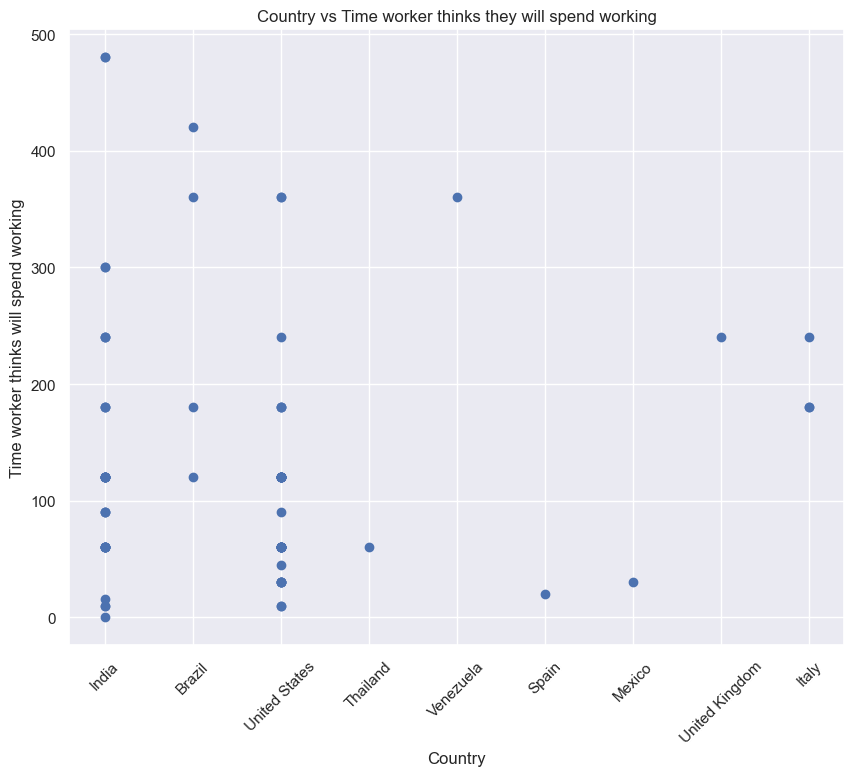

In [8]:
df_mturk_short['Time worker thinks will spend working'] = df_mturk_short['Time worker thinks will spend working'].astype(int)

x = df_mturk_short['Country']
y = df_mturk_short['Time worker thinks will spend working']

plt.figure(figsize=(10, 8))
plt.scatter(x, y)
plt.xlabel('Country')
plt.ylabel('Time worker thinks will spend working')
plt.title('Country vs Time worker thinks they will spend working')
plt.xticks(rotation=45)
plt.show()



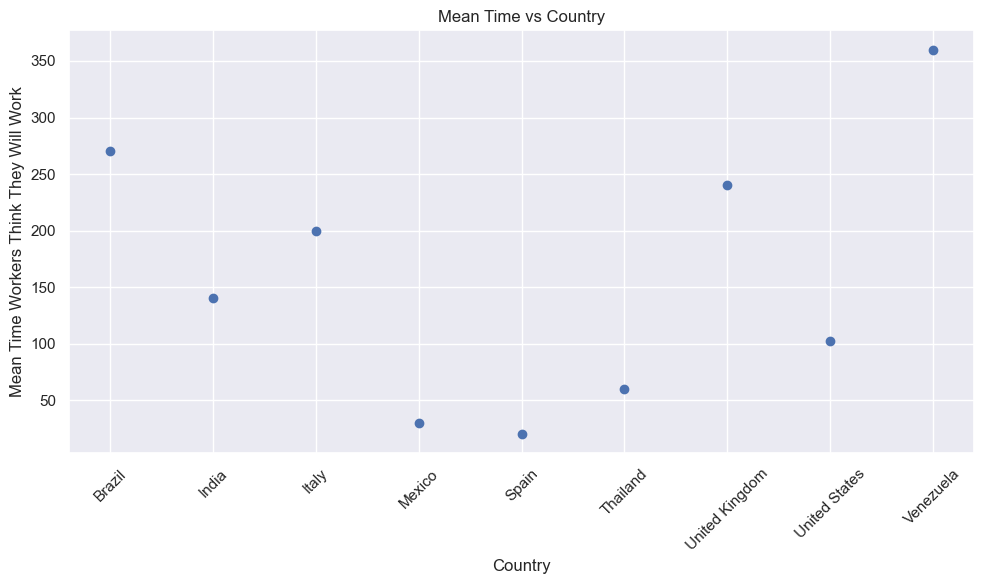

In [9]:
mean_time_by_country = df_mturk_short.groupby('Country')['Time worker thinks will spend working'].mean()

# Extract x (country names) and y (mean time) data
x = mean_time_by_country.index
y = mean_time_by_country.values


# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y)


# Add labels and title
plt.xlabel('Country')
plt.ylabel('Mean Time Workers Think They Will Work')
plt.title('Mean Time vs Country')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

# DATA MERGING

In [10]:
df_mturk_short = df_mturk_short.rename(columns={'user_id': 'User'})
merged_mturk = pd.merge(df_mturk, df_mturk_short, on='User', how='left')
merged_mturk = merged_mturk.dropna()
merged_mturk

,ID,Current,Event,Platform,Subtype,Time,Type,User,id,Worker ID,Time worker thinks will spend working,"How many hours daily would you like to dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)",Hourly Wage: Amazon MTurk,Gender,Age,Country,Education level,Annual income
0,1,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_LOAD,OTHER,OTHER,1588994215395,OTHER,ae862298385abab2a0a1619f8cedef9d,0.0,A3QVZ4SZB79D8W,120.0,90,6,Male,25-34 years old,United States,Master’s degree,"$80,000 – $89,999"
1,2,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_BLUR,OTHER,OTHER,1588994217989,OTHER,ae862298385abab2a0a1619f8cedef9d,0.0,A3QVZ4SZB79D8W,120.0,90,6,Male,25-34 years old,United States,Master’s degree,"$80,000 – $89,999"
2,3,https://worker.mturk.com/projects/354DQCRRIJZH...,TAB_CHANGE,MTURK,TASK_STARTED,1588994218051,WORKING,ae862298385abab2a0a1619f8cedef9d,0.0,A3QVZ4SZB79D8W,120.0,90,6,Male,25-34 years old,United States,Master’s degree,"$80,000 – $89,999"
3,4,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_FOCUS,OTHER,OTHER,1588994221371,OTHER,ae862298385abab2a0a1619f8cedef9d,0.0,A3QVZ4SZB79D8W,120.0,90,6,Male,25-34 years old,United States,Master’s degree,"$80,000 – $89,999"
4,5,https://docs.google.com/forms/d/e/1FAIpQLScvig...,TAB_CHANGE,OTHER,OTHER,1588994221397,OTHER,ae862298385abab2a0a1619f8cedef9d,0.0,A3QVZ4SZB79D8W,120.0,90,6,Male,25-34 years old,United States,Master’s degree,"$80,000 – $89,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496105,3496371,https://airtable.com/embed/shrwcKGxAhzziNEyy?b...,PAGE_FOCUS,OTHER,OTHER,1590165181732,OTHER,c45ae0d5903111f7536eff13443b121f,18.0,AGBA9QNP2BKR1,120.0,60,5,Female,25-34 years old,India,Bachelor’s degree,"$0 – $9,999"
3496106,3496372,https://worker.mturk.com/projects/3QG9DTEQIL8T...,TAB_CHANGE,MTURK,TASK_SUBMITED,1590165181743,WORKING,c45ae0d5903111f7536eff13443b121f,18.0,AGBA9QNP2BKR1,120.0,60,5,Female,25-34 years old,India,Bachelor’s degree,"$0 – $9,999"
3496107,3496373,https://worker.mturk.com/?hit_forker,PAGE_INACTIVITY,MTURK,UNKNOWN,1590165203611,UNKNOWN,83fbc02785ea9b9d6951be0e201ee1,87.0,AEWGY34WUIA32,30.0,30,6,Male,25-34 years old,United States,Bachelor’s degree,"$40,000 – $49,999"
3496108,3496374,https://www.mturkcontent.com/dynamic/hit?assig...,PAGE_INACTIVITY,MTURK,TASK_FRAME,1590165235664,WORKING,c45ae0d5903111f7536eff13443b121f,18.0,AGBA9QNP2BKR1,120.0,60,5,Female,25-34 years old,India,Bachelor’s degree,"$0 – $9,999"


In [11]:
df_mturk_model_unlabeled = merged_mturk.drop(columns=['Current', 'id', 'ID', 'Worker ID', 'User'])
df_mturk_model_unlabeled

,Event,Platform,Subtype,Time,Type,Time worker thinks will spend working,"How many hours daily would you like to dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)",Hourly Wage: Amazon MTurk,Gender,Age,Country,Education level,Annual income
0,PAGE_LOAD,OTHER,OTHER,1588994215395,OTHER,120.0,90,6,Male,25-34 years old,United States,Master’s degree,"$80,000 – $89,999"
1,PAGE_BLUR,OTHER,OTHER,1588994217989,OTHER,120.0,90,6,Male,25-34 years old,United States,Master’s degree,"$80,000 – $89,999"
2,TAB_CHANGE,MTURK,TASK_STARTED,1588994218051,WORKING,120.0,90,6,Male,25-34 years old,United States,Master’s degree,"$80,000 – $89,999"
3,PAGE_FOCUS,OTHER,OTHER,1588994221371,OTHER,120.0,90,6,Male,25-34 years old,United States,Master’s degree,"$80,000 – $89,999"
4,TAB_CHANGE,OTHER,OTHER,1588994221397,OTHER,120.0,90,6,Male,25-34 years old,United States,Master’s degree,"$80,000 – $89,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496105,PAGE_FOCUS,OTHER,OTHER,1590165181732,OTHER,120.0,60,5,Female,25-34 years old,India,Bachelor’s degree,"$0 – $9,999"
3496106,TAB_CHANGE,MTURK,TASK_SUBMITED,1590165181743,WORKING,120.0,60,5,Female,25-34 years old,India,Bachelor’s degree,"$0 – $9,999"
3496107,PAGE_INACTIVITY,MTURK,UNKNOWN,1590165203611,UNKNOWN,30.0,30,6,Male,25-34 years old,United States,Bachelor’s degree,"$40,000 – $49,999"
3496108,PAGE_INACTIVITY,MTURK,TASK_FRAME,1590165235664,WORKING,120.0,60,5,Female,25-34 years old,India,Bachelor’s degree,"$0 – $9,999"


In [12]:
from sklearn.preprocessing import LabelEncoder

df_mturk_model = pd.DataFrame(df_mturk_model_unlabeled)

Encoders = {}
Encoders['Event'] = LabelEncoder()
df_mturk_model['Event'] = Encoders['Event'].fit_transform(df_mturk_model['Event'])
Encoders['Platform'] = LabelEncoder()
df_mturk_model['Platform'] = Encoders['Platform'].fit_transform(df_mturk_model['Platform'])
Encoders['Subtype'] = LabelEncoder()
df_mturk_model['Subtype'] = Encoders['Subtype'].fit_transform(df_mturk_model['Subtype'])
Encoders['Type'] = LabelEncoder()
df_mturk_model['Type'] = Encoders['Type'].fit_transform(df_mturk_model['Type'])
Encoders['Age'] = LabelEncoder()
df_mturk_model['Age'] = Encoders['Age'].fit_transform(df_mturk_model['Age'])
Encoders['Education level'] = LabelEncoder()
df_mturk_model['Education level'] = Encoders['Education level'].fit_transform(df_mturk_model['Education level'])
Encoders['Annual income'] = LabelEncoder()
df_mturk_model['Annual income'] = Encoders['Annual income'].fit_transform(df_mturk_model['Annual income'])
Encoders['Gender'] = LabelEncoder()
df_mturk_model['Gender'] = Encoders['Gender'].fit_transform(df_mturk_model['Gender'])
Encoders['Country'] = LabelEncoder()
df_mturk_model['Country'] = Encoders['Country'].fit_transform(df_mturk_model['Country'])

Encoders['Hourly Wage: Amazon MTurk'] = LabelEncoder()
df_mturk_model['Hourly Wage: Amazon MTurk'] = Encoders['Hourly Wage: Amazon MTurk'].fit_transform(df_mturk_model['Hourly Wage: Amazon MTurk'])
Encoders['How many hours daily would you like to  dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)'] = LabelEncoder()
df_mturk_model['How many hours daily would you like to  dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)'] = Encoders['How many hours daily would you like to  dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)'].fit_transform(df_mturk_model['How many hours daily would you like to  dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)'])

df_mturk_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3173140 entries, 0 to 3496109
Data columns (total 13 columns):
 #   Column                                                                                                                                     Dtype  
---  ------                                                                                                                                     -----  
 0   Event                                                                                                                                      int32  
 1   Platform                                                                                                                                   int32  
 2   Subtype                                                                                                                                    int32  
 3   Time                                                                                                                           

In [13]:
target_df = df_mturk_model['Country']
data_df = df_mturk_model.drop(columns=['Country'])

target_df = target_df.iloc[150000:180000]
data_df = data_df.iloc[150000:180000]

scale = MinMaxScaler()

data_df = pd.DataFrame(scale.fit_transform(data_df), columns=data_df.columns)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(data_df, target_df, test_size=0.20, random_state=50)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.20, random_state=50)
data_df

,Event,Platform,Subtype,Time,Type,Time worker thinks will spend working,"How many hours daily would you like to dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)",Hourly Wage: Amazon MTurk,Gender,Age,Education level,Annual income
0,1.000000,1.0,0.148148,0.581242,0.375,0.361702,0.230769,0.413793,1.0,0.25,0.000000,0.555556
1,0.117647,0.0,0.851852,0.008137,0.500,0.234043,0.384615,0.413793,1.0,0.25,1.000000,0.444444
2,0.117647,1.0,0.148148,0.581297,0.375,0.361702,0.230769,0.413793,1.0,0.25,0.000000,0.555556
3,0.058824,0.0,0.037037,0.582418,0.250,0.106383,0.923077,0.724138,1.0,0.25,1.000000,0.666667
4,0.058824,0.0,0.037037,0.582418,0.250,0.106383,0.923077,0.724138,1.0,0.25,1.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.941176,0.0,0.296296,0.990782,0.750,0.106383,0.230769,0.448276,1.0,0.25,0.333333,0.111111
29996,0.294118,0.0,0.296296,0.990780,0.750,0.106383,0.230769,0.448276,1.0,0.25,0.333333,0.111111
29997,0.529412,1.0,0.148148,0.990782,0.375,0.106383,0.000000,0.655172,0.0,0.50,0.000000,0.111111
29998,0.117647,0.0,0.370370,0.990780,0.750,0.106383,0.230769,0.448276,1.0,0.25,0.333333,0.111111


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
models = [
    ('log', LogisticRegression(max_iter=1000)),
    ('svc', SVC()),
    ('ridge', Ridge()),
    ('lasso', Lasso())
    
]

In [15]:
params = {
    'log': {'C': [0.1, 1.0, 10.0]},
    'svc': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    'ridge': {'alpha': [0.1, 1.0, 10.0]},
    'lasso': {'alpha': [0.1, 1.0, 10.0]}
}

In [16]:
from sklearn.model_selection import KFold
best = None
bestAc = 0.0
n_splits = 5
kf = KFold(n_splits=n_splits)

for name, model in models:
    search = GridSearchCV(model, params[name], cv=kf, n_jobs=-1)
    search.fit(Xtrain, Ytrain)
    accuracy = search.score(Xval, Yval)
    if accuracy > bestAc:
        best = search.best_estimator_
        bestAc = accuracy
    print(f"{name} valid accuracy = {accuracy}")

log valid accuracy = 0.848125
svc valid accuracy = 0.9997916666666666
ridge valid accuracy = 0.2562766376578176
lasso valid accuracy = 0.1815266429189636


In [17]:
from sklearn.metrics import accuracy_score

test = accuracy_score(Ytest, best.predict(Xtest))
print(f"Best model = ({type(best).__name__}) accuracy = {test}")

Best model = (SVC) accuracy = 0.9998333333333334


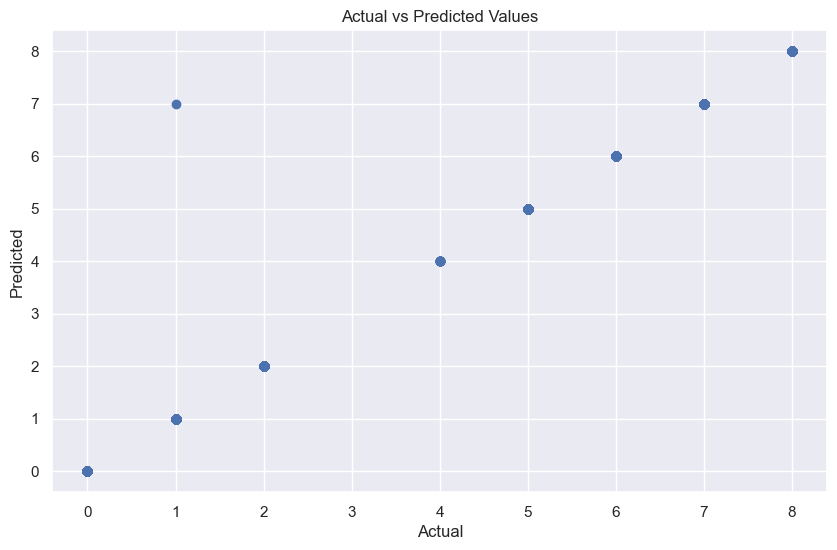

In [18]:
# Make predictions on the test set
predictions = best.predict(Xtest)

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Ytest, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


Mean Squared Error: 2.583991838413537


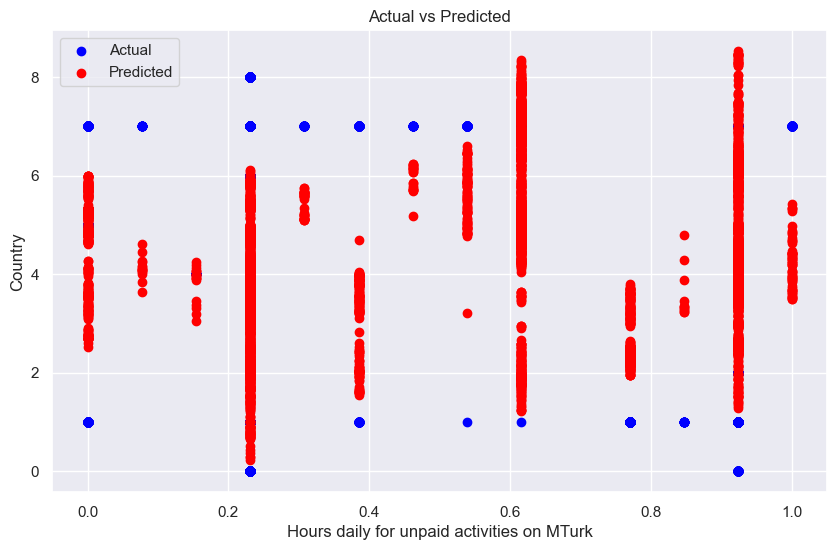

In [19]:
# Training the model
model = GridSearchCV(Ridge(), params['ridge'], cv=kf, n_jobs=-1)  # You can use any model here, I'm using Ridge regression as an example
model.fit(Xtrain, Ytrain)

# Making predictions
y_pred = model.predict(Xtest)

# Calculating MSE (Mean Squared Error)
mse = np.sqrt(mean_squared_error(Ytest, y_pred))
print("Mean Squared Error:", mse)

X_Hours = Xtest['How many hours daily would you like to  dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)']

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(X_Hours, Ytest, color='blue', label='Actual')
plt.scatter(X_Hours, y_pred, color='red', label='Predicted')
plt.xlabel('Hours daily for unpaid activities on MTurk')
plt.ylabel('Country')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 0.006


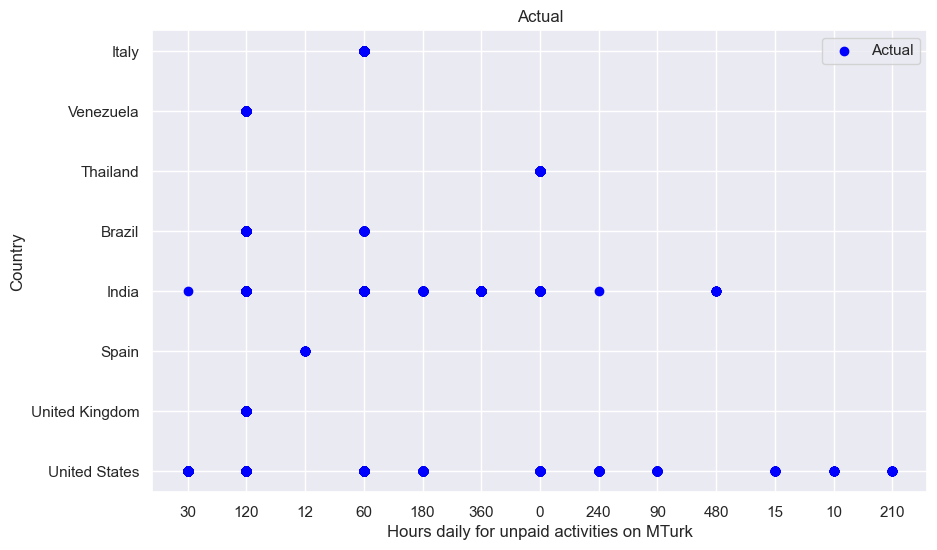

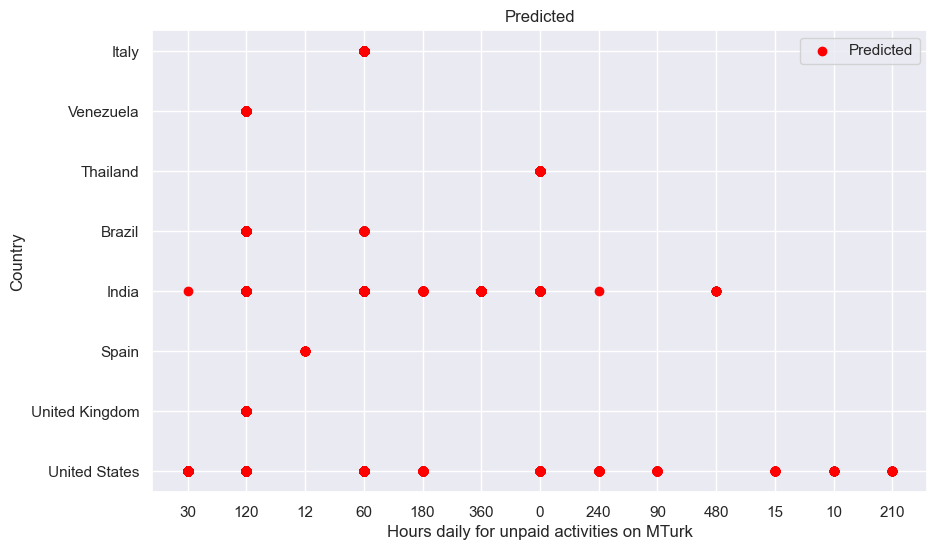

In [20]:
# Making predictions
y_pred = best.predict(Xtest)

# Extracting feature and target variables
X_Hours = pd.DataFrame(scale.inverse_transform(Xtest), columns=Xtest.columns)
X_Hours = X_Hours['How many hours daily would you like to  dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)'].astype(int)
X_Hours = Encoders['How many hours daily would you like to  dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)'].inverse_transform(X_Hours)

y_test = Encoders['Country'].inverse_transform(Ytest)
y_predict = Encoders['Country'].inverse_transform(y_pred)

# Calculating MSE (Mean Squared Error)
mse = mean_squared_error(Ytest, y_pred)
print("Mean Squared Error:", mse)

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(X_Hours, y_test, color='blue', label='Actual')
plt.xlabel('Hours daily for unpaid activities on MTurk')
plt.ylabel('Country')
plt.title('Actual')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(X_Hours, y_predict, color='red', label='Predicted')
plt.xlabel('Hours daily for unpaid activities on MTurk')
plt.ylabel('Country')
plt.title('Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
print(df_mturk_short['How many hours daily would you like to  dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)'].head(20))


1      60
2      30
3      60
4     120
7     120
9      60
10     15
11     60
12     60
13     30
14    120
15     60
16    120
20      0
21    120
22     60
23     10
24     60
25     30
27    180
Name: How many hours daily would you like to  dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters), dtype: object


In [22]:
Xtest.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 16609 to 5749
Data columns (total 12 columns):
 #   Column                                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                                     --------------  -----  
 0   Event                                                                                                                                      6000 non-null   float64
 1   Platform                                                                                                                                   6000 non-null   float64
 2   Subtype                                                                                                                                    6000 non-null   float64
 3   Time                                             

Mean Squared Error: 0.006


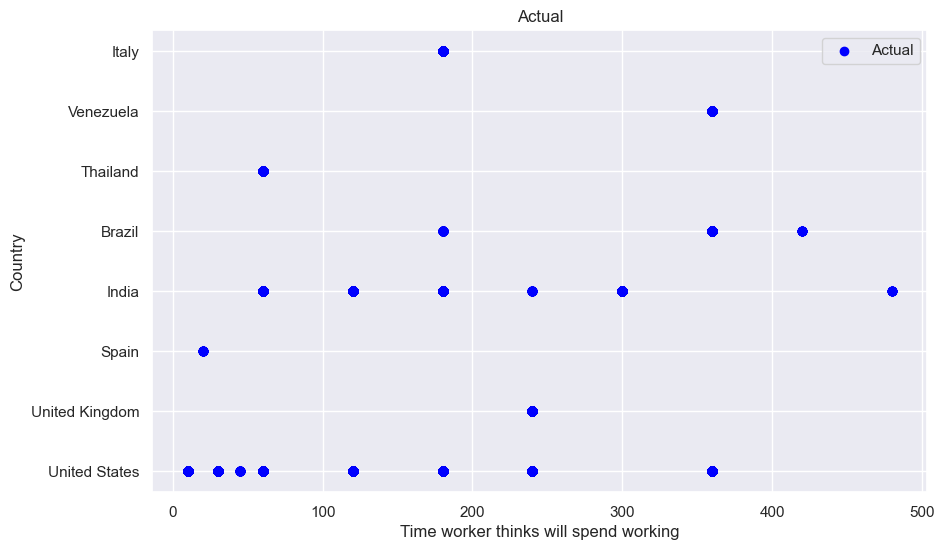

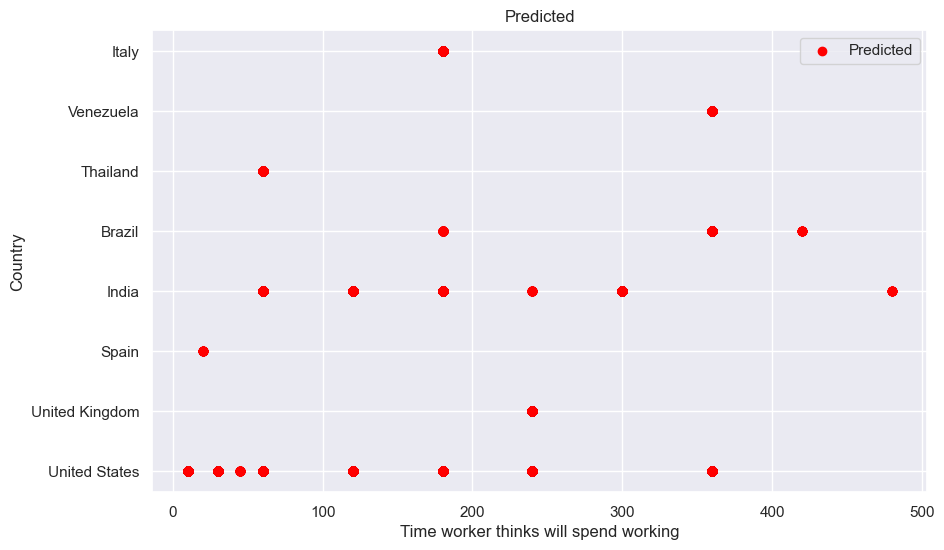

In [24]:
# Making predictions
y_pred = best.predict(Xtest)

# Extracting feature and target variables
X_Hours = pd.DataFrame(scale.inverse_transform(Xtest), columns=Xtest.columns)
X_Hours = X_Hours['Time worker thinks will spend working'] #.astype(int)
#X_Hours = Encoders['Time worker thinks will spend working'].inverse_transform(X_Hours)

y_test = Encoders['Country'].inverse_transform(Ytest)
y_predict = Encoders['Country'].inverse_transform(y_pred)

# Calculating MSE (Mean Squared Error)
mse = mean_squared_error(Ytest, y_pred)
print("Mean Squared Error:", mse)

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(X_Hours, y_test, color='blue', label='Actual')
plt.xlabel('Time worker thinks will spend working')
plt.ylabel('Country')
plt.title('Actual')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(X_Hours, y_predict, color='red', label='Predicted')
plt.xlabel('Time worker thinks will spend working')
plt.ylabel('Country')
plt.title('Predicted')
plt.legend()
plt.grid(True)
plt.show()